In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import f_oneway

In [ ]:
df=pd.read_csv(r"C:\Users\User\Desktop\Projects\Real Estate\House Dataset\train.csv")

In [ ]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
df.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum() 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Data Preprocessing

In [ ]:
cat=df.select_dtypes(include=['object','category']).columns
num=df.select_dtypes(exclude='object')

In [ ]:
cat.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
num.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


we have 43 Columns of Catagorical and 38 for numerical so handle them accordingly

In [ ]:
print("Missing values in Each Columns")
print("="*30)
print(df.isna().sum())
print("="*30)
print(f"Total Missing Values: ",df.isna().sum().sum())

Missing values in Each Columns
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Total Missing Values:  7829


As there are missing values we have mostly three common ways first is to get a value counts of each row then we can replace it with mode for catagorical and median/mean for numerical also we can drop them and we can also make a small ml model to predict this value.

In [ ]:
print("Missing values in Each Catagorical Columns")
print("="*30)
print(cat.isna().sum())
print("="*30)
print(f"Total Missing catagorical Values: ",cat.isna().sum().sum())

Missing values in Each Catagorical Columns
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int6

In [ ]:
df=cat.fillna(cat.mode().iloc[0])

In [ ]:
print("Total Null Values in Catagorical Column Now:",cat.isna().sum().sum())

Total Null Values in Catagorical Column Now: 7481


In [ ]:
print("Missing values in Each Numerical Columns")
print("="*30)
print(num.isna().sum())
print("="*30)
print(f"Total Missing Numerical Values: ",num.isna().sum().sum())

Missing values in Each Numerical Columns
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
Total Missing Numerical Values:  348


In [ ]:
df=num.fillna(num.median())

In [ ]:
print(f"Total Null values in Numerical Columns Now : {num.isna().sum().sum()}")

Total Null values in Numerical Columns Now : 348


Now in second step of preprocessing we will handle duplicated data

In [ ]:
print(f"Total duplicated rows:",df.duplicated().sum().sum())

Total duplicated rows: 0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(f"Total duplicated rows:",df.duplicated().sum().sum())

Total duplicated rows: 0


Now we will drop features that arae less corelated with our target bcz moving on with them will be useless

In [ ]:
corr=num.corr()

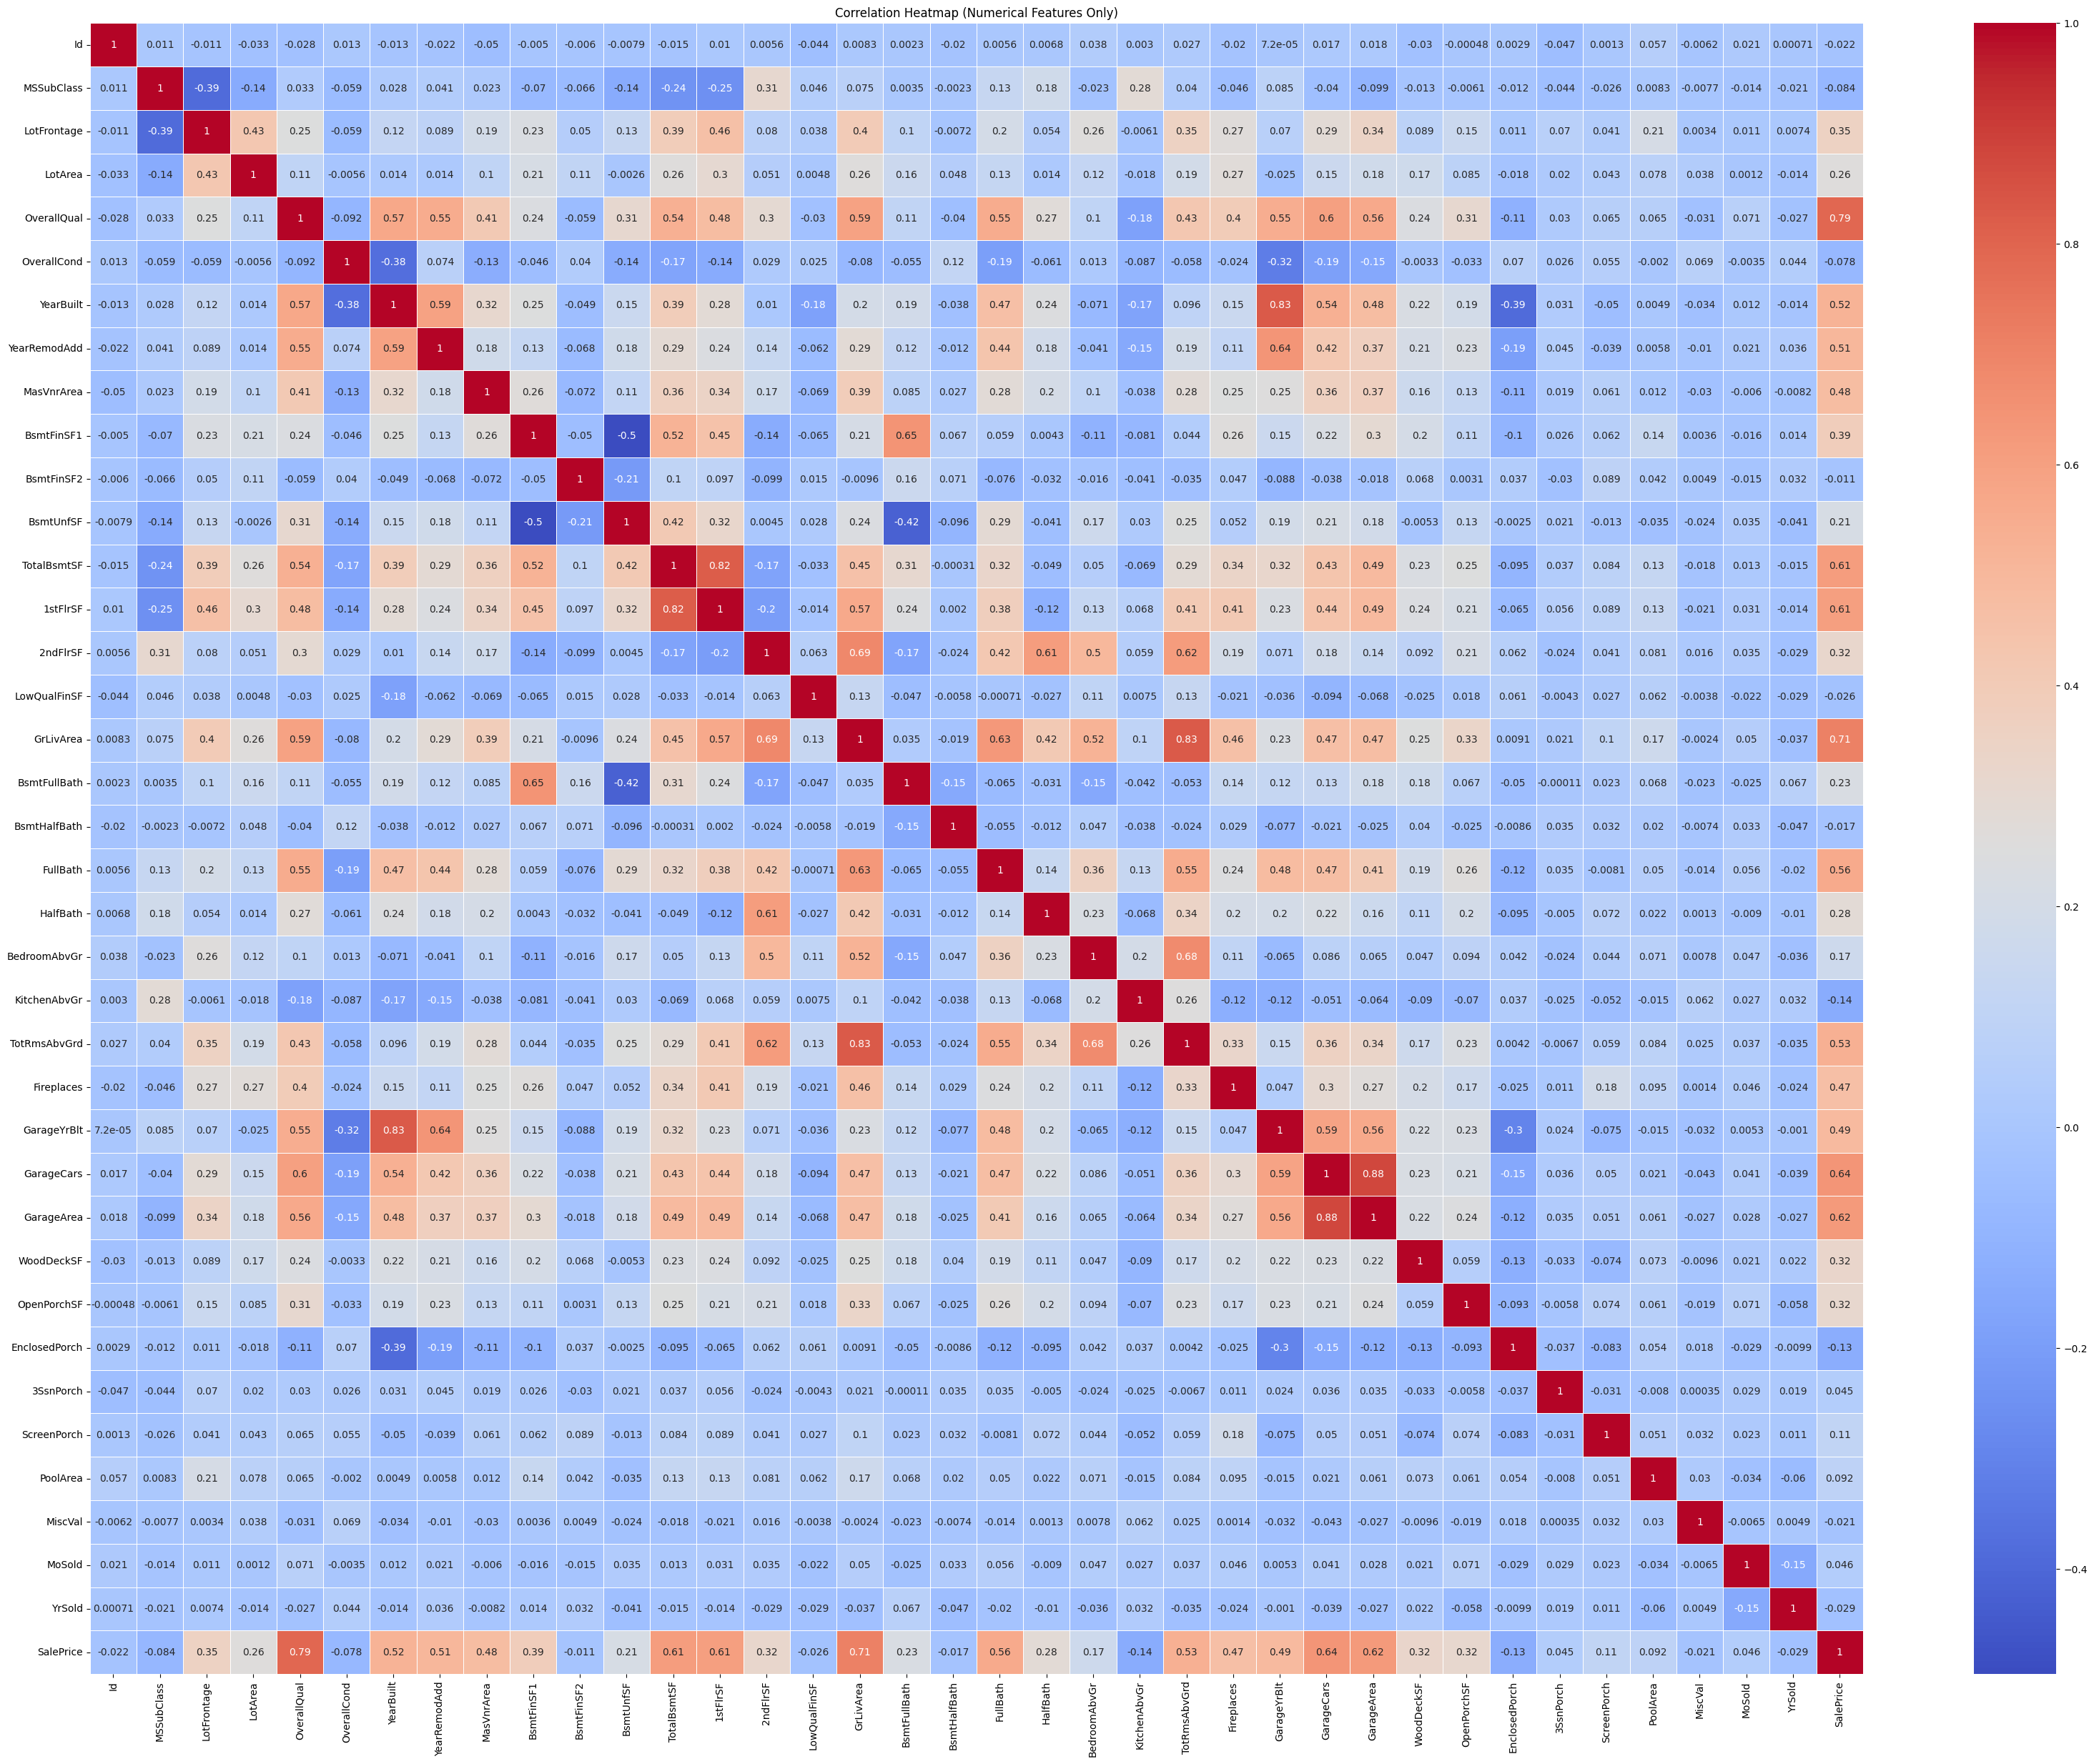

In [ ]:
plt.figure(figsize=(40, 30))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


In [ ]:
target = 'SalePrice'
corr_target = corr[target].abs().sort_values(ascending=False)


In [ ]:
selected_num = corr_target[corr_target > 0.3].index.tolist()


In [ ]:
anova_results = {}
for col in cat:
    groups = [df[df[col]==cat][target].dropna() for cat in df[col].unique()]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = p_val

C:\Users\User\AppData\Local\Temp\ipykernel_19444\1113498506.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = f_oneway(*groups)


In [ ]:
anova_df = pd.Series(anova_results).sort_values()
selected_cat = anova_df[anova_df < 0.05].index.tolist()

In [ ]:
selected_cat

['Neighborhood',
 'ExterQual',
 'KitchenQual',
 'Foundation',
 'HeatingQC',
 'SaleCondition',
 'Exterior1st',
 'Exterior2nd',
 'SaleType',
 'MSZoning',
 'HouseStyle',
 'LotShape',
 'CentralAir',
 'PavedDrive',
 'RoofStyle',
 'BldgType',
 'LandContour',
 'RoofMatl',
 'Condition1',
 'ExterCond',
 'LotConfig',
 'Functional',
 'Heating',
 'Condition2']

In [ ]:
df_selected = df[selected_num + selected_cat + [target]]

In [ ]:
df_selected.head(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,BldgType,LandContour,RoofMatl,Condition1,ExterCond,LotConfig,Functional,Heating,Condition2,SalePrice
0,208500,7,1710,2,548,856,856,2,8,2003,...,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm,208500
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1Fam,Lvl,CompShg,Feedr,TA,FR2,Typ,GasA,Norm,181500
2,223500,7,1786,2,608,920,920,2,6,2001,...,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm,223500


so we are able to remove half of our colums according to their corelation with our target variable

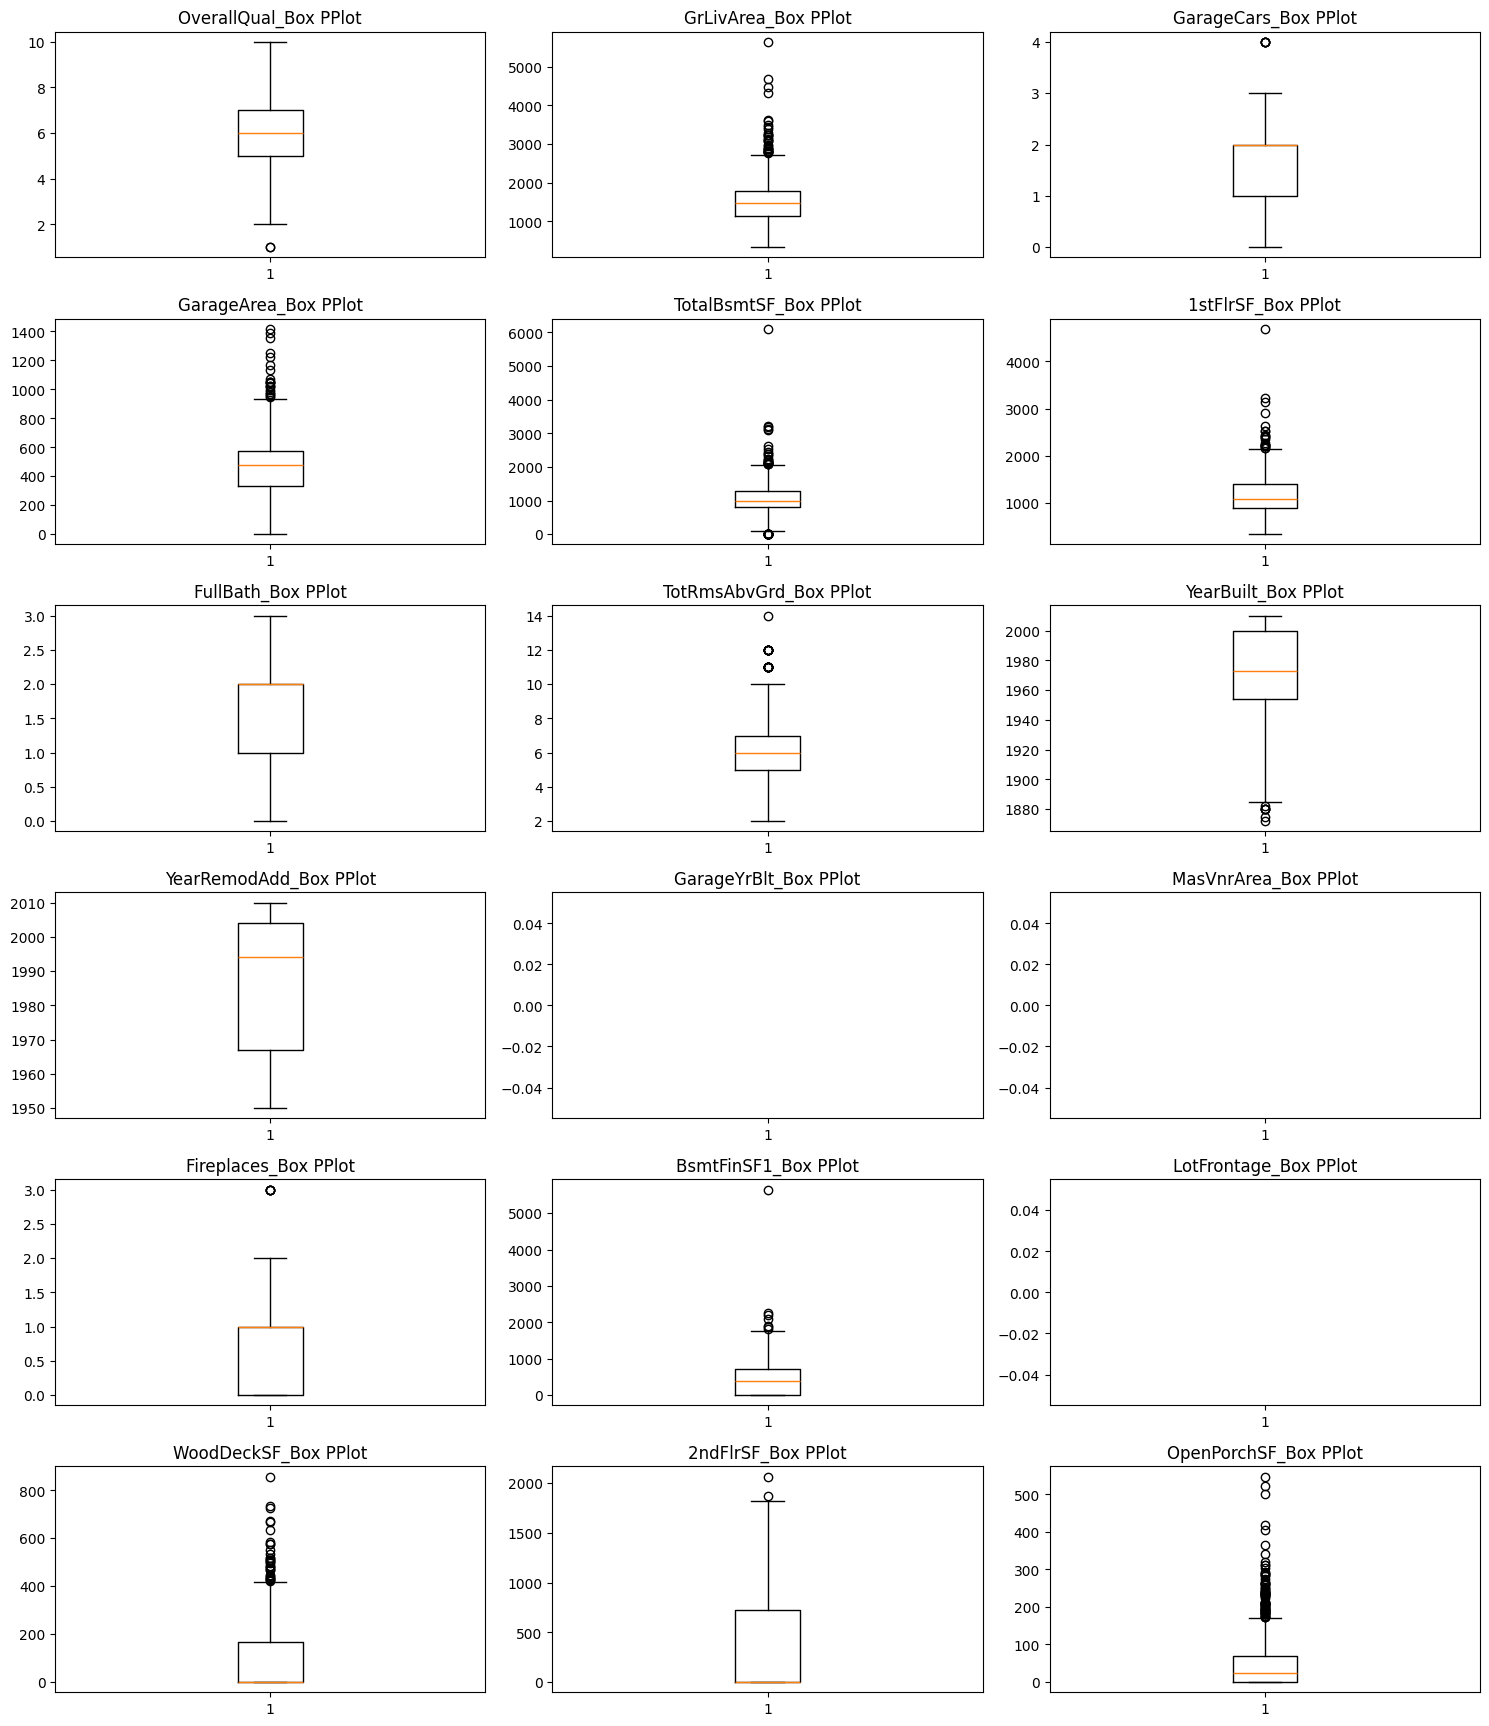

In [ ]:
plt.figure(figsize=(15,20))
for col in range(len(selected_num)):
    plt.subplot(7,3,(col+1))
    plt.boxplot(df[selected_num[col]])
    plt.title(f'{selected_num[col]}_Box PPlot')
plt.tight_layout()
plt.show()

In [ ]:
for col in selected_num:
    Q1 = round(np.percentile(df[col], 25), 2)
    Q3 = round(np.percentile(df[col], 75), 2)
    IQR = Q3 - Q1
    lb = Q1 - IQR * 1.5
    ub = Q3 + IQR * 1.5

    con = (df[col] < lb) | (df[col] > ub)

    outlier_df = df[col][con]              
    print(f'{col} = {len(outlier_df)} Outliers')

SalePrice = 61 Outliers
OverallQual = 2 Outliers
GrLivArea = 31 Outliers
GarageCars = 5 Outliers
GarageArea = 21 Outliers
TotalBsmtSF = 61 Outliers
1stFlrSF = 20 Outliers
FullBath = 0 Outliers
TotRmsAbvGrd = 30 Outliers
YearBuilt = 7 Outliers
YearRemodAdd = 0 Outliers
GarageYrBlt = 0 Outliers
MasVnrArea = 0 Outliers
Fireplaces = 5 Outliers
BsmtFinSF1 = 7 Outliers
LotFrontage = 0 Outliers
WoodDeckSF = 32 Outliers
2ndFlrSF = 2 Outliers
OpenPorchSF = 77 Outliers


In [ ]:
for col in selected_num:
        Q1 = round(np.percentile(df[col], 25), 2)
        Q3 = round(np.percentile(df[col], 75), 2)
        IQR = Q3 - Q1
        lb = Q1 -  1.5 * IQR
        ub = Q3 +  1.5 * IQR
        df[col]=df[col].clip(lower=lb,upper=ub)

Now outliers are detected and treated fully now we will do encoding of catagorical data type.There are two different techniques one hot encoding and label encoding for this we will divide our catagories into two sub parts in one we will apply one hot encoding which will be best for data that donot has any order i.e it is nominal and for other we will do label encoding i.e data has an order.

,Neighborhood,ExterQual,KitchenQual,Foundation,HeatingQC,SaleCondition,Exterior1st,Exterior2nd,SaleType,MSZoning,...,RoofStyle,BldgType,LandContour,RoofMatl,Condition1,ExterCond,LotConfig,Functional,Heating,Condition2
1450,NAmes,TA,TA,CBlock,TA,Normal,VinylSd,VinylSd,WD,RL,...,Gable,Duplex,Lvl,CompShg,Norm,TA,FR2,Typ,GasA,Norm
1451,Somerst,Gd,Ex,PConc,Ex,Partial,CemntBd,CmentBd,New,RL,...,Gable,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm
1452,Edwards,TA,TA,PConc,Gd,Normal,VinylSd,VinylSd,WD,RM,...,Gable,TwnhsE,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm
1453,Mitchel,TA,TA,PConc,Ex,Abnorml,VinylSd,VinylSd,WD,RL,...,Gable,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm
1454,Somerst,Gd,Gd,PConc,Ex,Normal,VinylSd,VinylSd,WD,FV,...,Gable,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm
1455,Gilbert,TA,TA,PConc,Ex,Normal,VinylSd,VinylSd,WD,RL,...,Gable,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm
1456,NWAmes,TA,TA,CBlock,TA,Normal,Plywood,Plywood,WD,RL,...,Gable,1Fam,Lvl,CompShg,Norm,TA,Inside,Min1,GasA,Norm
1457,Crawfor,Ex,Gd,Stone,Ex,Normal,CemntBd,CmentBd,WD,RL,...,Gable,1Fam,Lvl,CompShg,Norm,Gd,Inside,Typ,GasA,Norm
1458,NAmes,TA,Gd,CBlock,Gd,Normal,MetalSd,MetalSd,WD,RL,...,Hip,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm
1459,Edwards,Gd,TA,CBlock,Gd,Normal,HdBoard,HdBoard,WD,RL,...,Gable,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm


In [ ]:
for col in selected_cat:
    unique_count = df[col].nunique()
    print(f"{col} has {unique_count} unique values")

Neighborhood has 25 unique values
ExterQual has 4 unique values
KitchenQual has 4 unique values
Foundation has 6 unique values
HeatingQC has 5 unique values
SaleCondition has 6 unique values
Exterior1st has 15 unique values
Exterior2nd has 16 unique values
SaleType has 9 unique values
MSZoning has 5 unique values
HouseStyle has 8 unique values
LotShape has 4 unique values
CentralAir has 2 unique values
PavedDrive has 3 unique values
RoofStyle has 6 unique values
BldgType has 5 unique values
LandContour has 4 unique values
RoofMatl has 8 unique values
Condition1 has 9 unique values
ExterCond has 5 unique values
LotConfig has 5 unique values
Functional has 7 unique values
Heating has 6 unique values
Condition2 has 8 unique values


In [ ]:
onehot=df[['Exterior1st','KitchenQual','HeatingQC','MSZoning','LotShape','CentralAir','PavedDrive',"BldgType",'LandContour','ExterCond','LotConfig']]
onehot=pd.get_dummies(onehot,drop_first=True)

In [ ]:
df_selected.head(3)

,Neighborhood,ExterQual,KitchenQual,Foundation,HeatingQC,SaleCondition,Exterior1st,Exterior2nd,SaleType,MSZoning,...,RoofStyle,BldgType,LandContour,RoofMatl,Condition1,ExterCond,LotConfig,Functional,Heating,Condition2
0,CollgCr,Gd,Gd,PConc,Ex,Normal,VinylSd,VinylSd,WD,RL,...,Gable,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm
1,Veenker,TA,TA,CBlock,Ex,Normal,MetalSd,MetalSd,WD,RL,...,Gable,1Fam,Lvl,CompShg,Feedr,TA,FR2,Typ,GasA,Norm
2,CollgCr,Gd,Gd,PConc,Ex,Normal,VinylSd,VinylSd,WD,RL,...,Gable,1Fam,Lvl,CompShg,Norm,TA,Inside,Typ,GasA,Norm
